In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
files = os.listdir("../raw/results/comparison")

In [4]:
base_address = "../raw/results/comparison/"
df = pd.DataFrame()
for file in files:
    series = pd.read_csv(f"{base_address}{file}", header=None)[2]
    df[file.split(".")[0]] = series

In [5]:
df.head()

,MAR-325__train_f1,MAR-330__train_f1,MAR-335__train_f1,MAR-329__train_f1,MAR-332__train_f1,MAR-324__train_f1,MAR-336__train_f1,MAR-338__train_f1,MAR-333__train_f1,MAR-337__train_f1,MAR-328__train_f1,MAR-327__train_f1,MAR-326__train_f1,MAR-339__train_f1,MAR-331__train_f1
0,0.490476,0.377778,0.355556,0.281481,0.323810,0.314815,0.361905,0.277778,0.488889,0.433333,0.206349,0.250000,0.301587,0.206349,0.228571
1,0.340476,0.335185,0.422222,0.251462,0.298990,0.162963,0.367521,0.270677,0.308772,0.358974,0.309524,0.343434,0.335185,0.254545,0.257631
2,0.347034,0.312169,0.368132,0.361111,0.246753,0.233446,0.324045,0.249084,0.279202,0.308378,0.329966,0.305263,0.225885,0.344444,0.244444
3,0.294613,0.334637,0.370370,0.306607,0.281481,0.287347,0.296667,0.240594,0.249455,0.304598,0.390152,0.280864,0.288889,0.374253,0.262951
4,0.272875,0.324786,0.360914,0.361111,0.273148,0.317629,0.345679,0.282187,0.230700,0.323082,0.372685,0.270833,0.250204,0.335673,0.349464


In [6]:
df.columns

Index(['MAR-325__train_f1', 'MAR-330__train_f1', 'MAR-335__train_f1',
       'MAR-329__train_f1', 'MAR-332__train_f1', 'MAR-324__train_f1',
       'MAR-336__train_f1', 'MAR-338__train_f1', 'MAR-333__train_f1',
       'MAR-337__train_f1', 'MAR-328__train_f1', 'MAR-327__train_f1',
       'MAR-326__train_f1', 'MAR-339__train_f1', 'MAR-331__train_f1'],
      dtype='object')

In [7]:
CA_cols = ["MAR-329__train_f1", "MAR-330__train_f1", "MAR-331__train_f1", "MAR-332__train_f1", "MAR-333__train_f1"]
CUA_cols = ["MAR-324__train_f1", "MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1"]
TCA_cols = ["MAR-339__train_f1", "MAR-335__train_f1", "MAR-336__train_f1", "MAR-337__train_f1", "MAR-338__train_f1"]
# Calculate the average, min, and max
df['CA_Average'] = df[CA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['CA_Min'] = df[CA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['CA_Max'] = df[CA_cols].max(axis=1).ewm(span=500, adjust=False).mean()
# Calculate the average, min, and max
df['CUA_Average'] = df[CUA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['CUA_Min'] = df[CUA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['CUA_Max'] = df[CUA_cols].max(axis=1).ewm(span=500, adjust=False).mean()
# Calculate the average, min, and max
df['TCA_Average'] = df[TCA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['TCA_Min'] = df[TCA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['TCA_Max'] = df[TCA_cols].max(axis=1).ewm(span=500, adjust=False).mean()

In [8]:
plt_df = df.iloc[:7001]
plt_df = plt_df * 100

In [9]:
plt_df

,MAR-325__train_f1,MAR-330__train_f1,MAR-335__train_f1,MAR-329__train_f1,MAR-332__train_f1,MAR-324__train_f1,MAR-336__train_f1,MAR-338__train_f1,MAR-333__train_f1,MAR-337__train_f1,...,MAR-331__train_f1,CA_Average,CA_Min,CA_Max,CUA_Average,CUA_Min,CUA_Max,TCA_Average,TCA_Min,TCA_Max
0,49.047619,37.777778,35.555556,28.148148,32.380952,31.481481,36.190476,27.777778,48.888889,43.333333,...,22.857143,34.010582,22.857143,48.888889,31.264550,20.634921,49.047619,32.698413,20.634921,43.333333
1,34.047619,33.518519,42.222222,25.146199,29.898990,16.296296,36.752137,27.067669,30.877193,35.897436,...,25.763126,33.990743,22.866281,48.827530,31.258830,20.617601,48.988920,32.701528,20.654161,43.328898
2,34.703425,31.216931,36.813187,36.111111,24.675325,23.344557,32.404541,24.908425,27.920228,30.837790,...,24.444444,33.970315,22.872581,48.776766,31.249142,20.625469,48.931892,32.698255,20.671144,43.302887
3,29.461279,33.463691,37.037037,30.660661,28.148148,28.734716,29.666667,24.059353,24.945534,30.459770,...,26.295058,33.949286,22.880856,48.715636,31.247498,20.655253,48.892304,32.694388,20.684670,43.279423
4,27.287508,32.478632,36.091411,36.111111,27.314815,31.762918,34.567901,28.218695,23.069986,32.308170,...,34.946375,33.936651,22.881611,48.665318,31.241258,20.672679,48.845902,32.695412,20.714745,43.250729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,43.348311,88.410765,90.721937,90.910060,89.891068,43.490359,91.054668,89.837994,90.160191,91.966893,...,91.152272,90.075218,88.406243,91.139143,43.349140,43.210615,43.550455,90.916107,89.805674,91.869595
6997,43.345546,88.401437,90.724808,90.912862,89.881792,43.480131,91.041686,89.837273,90.159564,91.969517,...,91.154857,90.075326,88.406224,91.139205,43.349398,43.210729,43.550873,90.916334,89.805800,91.869994
6998,43.345821,88.400538,90.723804,90.907389,89.885949,43.485001,91.044527,89.836668,90.154802,91.967993,...,91.153664,90.075426,88.406201,91.139263,43.349663,43.210843,43.551311,90.916562,89.805923,91.870385
6999,43.342002,88.404797,90.722788,90.905915,89.889948,43.477924,91.047389,89.835860,90.157939,91.970490,...,91.156147,90.075536,88.406195,91.139331,43.349913,43.210950,43.551722,90.916794,89.806042,91.870785


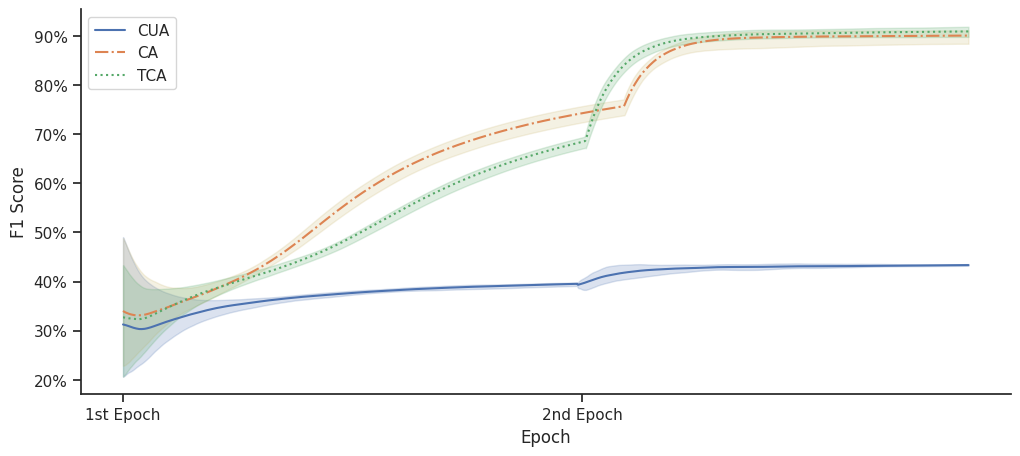

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the ticks with a percent sign
def percent_formatter(x, pos):
    return f'{x:.0f}%'

plt.figure(figsize=(12, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=plt_df, x=plt_df.index, y='CUA_Average', label='CUA')
plt.fill_between(plt_df.index, plt_df['CUA_Min'], plt_df['CUA_Max'], color='b', alpha=0.2)
sns.lineplot(data=plt_df, x=plt_df.index, y='CA_Average', linestyle='-.', label='CA')
plt.fill_between(plt_df.index, plt_df['CA_Min'], plt_df['CA_Max'], color='y', alpha=0.2)
sns.lineplot(data=plt_df, x=plt_df.index, y='TCA_Average', linestyle=':', label='TCA')
plt.fill_between(plt_df.index, plt_df['TCA_Min'], plt_df['TCA_Max'], color='g', alpha=0.2)
plt.xlabel('Epoch')
plt.ylabel('F1 Score')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Set specific ticks on the x-axis
plt.xticks([1, 3800], ["1st Epoch", '2nd Epoch'])

plt.legend()
plt.savefig('f1_score_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
files = os.listdir("../raw/results/frozen")
base_address = "../raw/results/frozen/"
df = pd.DataFrame()
for file in files:
    series = pd.read_csv(f"{base_address}{file}", header=None)[2]
    df[file.split(".")[0]] = series

In [12]:
df

,MAR-359__train_f1,MAR-329__train_f1,MAR-360__train_f1,MAR-357__train_f1
0,0.488889,0.281481,0.259259,0.490476
1,0.344444,0.251462,0.278846,0.335434
2,0.291866,0.361111,0.290196,0.366779
3,0.356683,0.306607,0.258333,0.322440
4,0.349091,0.361111,0.289988,0.331986
...,...,...,...,...
7557,0.922344,0.908974,0.923723,0.920440
7558,0.922331,0.908996,0.923711,0.920460
7559,0.922284,0.908988,0.923698,0.920482
7560,0.922304,0.908939,0.923687,0.920503


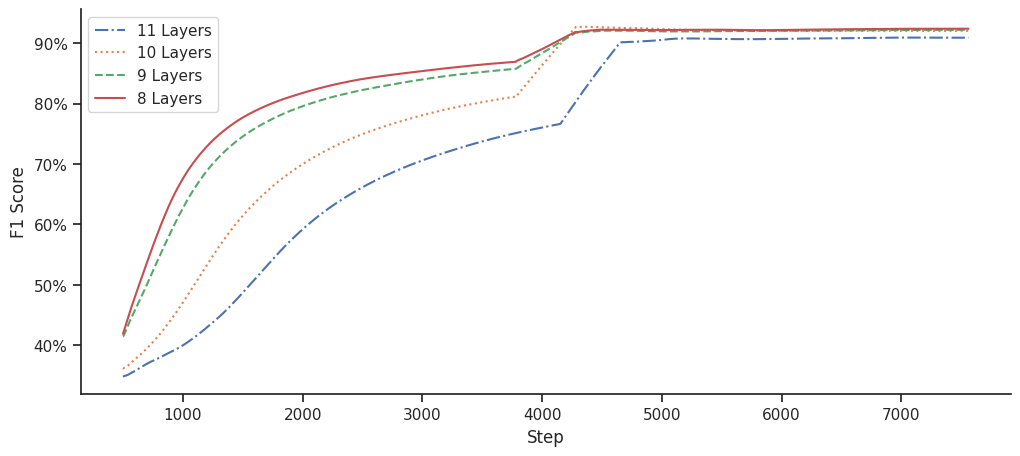

In [13]:
plt.figure(figsize=(12, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, linestyle='-.', label='11 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, linestyle=':', label='10 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, linestyle='dashed',label='9 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, label='8 Layers')
# plt.fill_between(plt_df.index, plt_df['CUA_Min'], plt_df['CUA_Max'], color='b', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot_frozen.png', dpi=200, bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


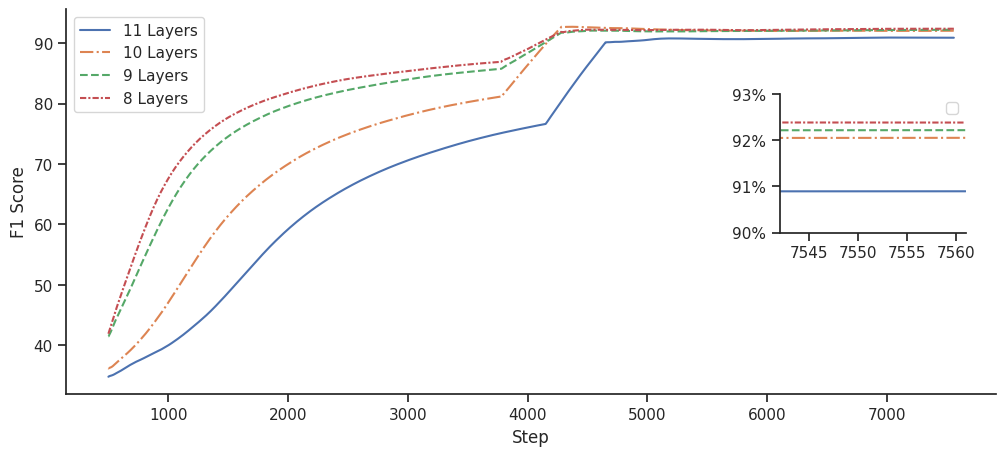

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming df is your DataFrame and percent_formatter is defined
plt.figure(figsize=(12, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Plotting the lines
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, label='11 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, linestyle="dashdot",label='10 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, linestyle="dashed", label='9 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, linestyle=(0, (3, 1, 1, 1)), label='8 Layers')

# Adding the inset
ax = plt.gca()
plt.xlabel('Step')
plt.ylabel('F1 Score')
ax_inset = inset_axes(ax, width="20%", height="30%", loc='center right', bbox_to_anchor=(0, 0, 1, 1.2), bbox_transform=ax.transAxes, borderpad=2)
# tuftefy(ax)

# Plotting the same lines in the inset
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, linestyle="dashdot", ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, linestyle="dashed", ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, linestyle=(0, (3, 1, 1, 1)), ax=ax_inset)

# Setting the limits for the inset
ax_inset.set_xlim(df.index[-20], df.index[-1])
ax_inset.set_ylim(90, 93)  # Adjust these limits based on your data
plt.xlabel(None)
plt.ylabel(None)
# Adding annotations for the final values with offsets
final_values = {
    '11 Layers': df['MAR-329__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '10 Layers': df['MAR-357__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '9 Layers': df['MAR-359__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '8 Layers': df['MAR-360__train_f1'].rolling(500).mean().iloc[-1] * 100
}

offsets = {
    '11 Layers': (0, 1),
    '10 Layers': (0, -1),
    '9 Layers': (0, 2),
    '8 Layers': (0, -2)
}

# ax_inset.label(None)

# for label, value in final_values.items():
#     ax_inset.text(df.index[-1], value + offsets[label][1], f'{value:.2f}%', horizontalalignment='left')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot_frozen.png', dpi=200, bbox_inches='tight')
plt.show()


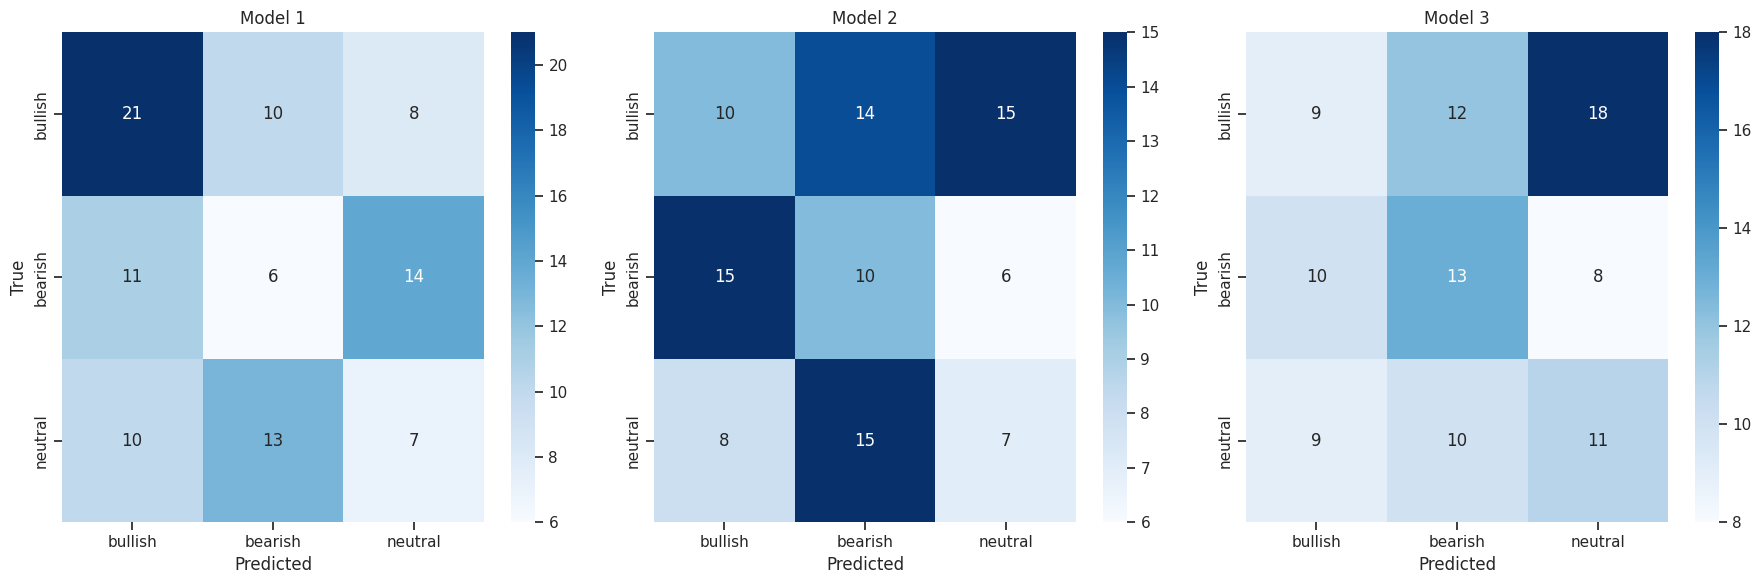

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate random confusion matrices
np.random.seed(43)  # For reproducibility

true_labels = np.random.choice(['bullish', 'bearish', 'neutral'], size=100)
pred_labels_model1 = np.random.choice(['bullish', 'bearish', 'neutral'], size=100)
pred_labels_model2 = np.random.choice(['bullish', 'bearish', 'neutral'], size=100)
pred_labels_model3 = np.random.choice(['bullish', 'bearish', 'neutral'], size=100)

# Generate confusion matrices
conf_matrices = [
    confusion_matrix(true_labels, pred_labels_model1, labels=['bullish', 'bearish', 'neutral']),
    confusion_matrix(true_labels, pred_labels_model2, labels=['bullish', 'bearish', 'neutral']),
    confusion_matrix(true_labels, pred_labels_model3, labels=['bullish', 'bearish', 'neutral'])
]

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

for i, cm in enumerate(conf_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], xticklabels=['bullish', 'bearish', 'neutral'], yticklabels=['bullish', 'bearish', 'neutral'])
    axes[i].set_title(f'Model {i+1}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()
